<a href="https://colab.research.google.com/github/sudhirtakke/Object-identification-using-CNN-Conv2D-/blob/main/Object_identification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object identification using CNN 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/cat_dog_panda.csv')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,label
0,195,196,198,200,202,204,206,207,205,206,208,208,204,194,183,174,171,175,170,157,154,161,162,156,166,173,169,168,180,190,199,212,198,204,206,204,205,209,208,203,...,175,171,166,171,177,189,208,204,196,200,194,174,177,187,177,167,173,181,184,183,182,182,184,183,172,167,173,175,169,168,174,161,163,164,163,166,170,170,165,1
1,10,7,4,3,4,5,4,4,3,3,3,3,3,3,3,3,9,22,6,4,0,21,11,17,21,0,1,11,5,8,9,0,1,14,0,6,0,9,0,4,...,134,125,122,110,110,122,130,118,125,110,98,109,110,110,126,172,176,176,170,168,172,176,177,175,173,142,140,95,85,108,144,128,168,118,144,139,133,139,155,1
2,202,194,204,193,197,188,195,179,166,126,100,101,110,118,116,102,110,102,116,118,99,110,124,107,122,117,129,127,93,123,51,136,96,67,51,64,57,52,57,46,...,118,177,205,208,210,187,215,191,188,136,109,62,76,47,84,91,72,54,56,74,83,70,51,52,59,49,47,65,64,54,62,63,68,60,78,62,76,73,88,2
3,111,129,167,91,116,149,81,112,127,141,121,115,116,112,127,129,150,126,179,151,128,156,153,183,101,145,210,106,158,129,168,139,122,107,113,164,127,104,146,151,...,45,23,53,44,124,232,230,169,111,83,100,135,38,179,79,137,141,184,102,98,84,107,82,120,117,59,124,103,151,95,93,186,92,98,101,67,90,126,107,2
4,92,84,86,80,83,83,83,87,85,85,85,84,84,85,89,92,178,198,212,211,209,213,212,206,204,201,205,202,212,217,205,213,197,206,41,22,110,216,185,217,...,163,177,182,174,100,12,0,3,2,1,1,3,3,2,1,3,3,3,3,3,3,3,3,5,4,3,2,2,2,3,4,1,1,2,3,3,4,5,5,1


In [ ]:
print(df.shape)
ntrain = df.shape[0]

(3000, 4097)


### Data Description:

This dataset consists of 3000 images of cats, dogs, and pandas.
Each class has a 1000 images and each image is labelled according to the class it belongs.


| Number of Samples | Animal | Label |
| :---: | :---: | :---: |
| 1000 samples |  cat | 1 |
| 1000 samples |  dog | 2 |
| 1000 samples |  panda | 3 |

### Extract X and y from the dataframe **df**.

- **X** should contain all the columns containing pixel values.

- **y** should contain the column *label*.

In [ ]:
def extract_x(df):
    X = df.drop(columns = ['label'], axis = 1)# Write code to extract X from the dataframe df.

    return X

In [ ]:
X = extract_x(df)
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel4057,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,195,196,198,200,202,204,206,207,205,206,208,208,204,194,183,174,171,175,170,157,154,161,162,156,166,173,169,168,180,190,199,212,198,204,206,204,205,209,208,203,...,168,175,171,166,171,177,189,208,204,196,200,194,174,177,187,177,167,173,181,184,183,182,182,184,183,172,167,173,175,169,168,174,161,163,164,163,166,170,170,165
1,10,7,4,3,4,5,4,4,3,3,3,3,3,3,3,3,9,22,6,4,0,21,11,17,21,0,1,11,5,8,9,0,1,14,0,6,0,9,0,4,...,155,134,125,122,110,110,122,130,118,125,110,98,109,110,110,126,172,176,176,170,168,172,176,177,175,173,142,140,95,85,108,144,128,168,118,144,139,133,139,155
2,202,194,204,193,197,188,195,179,166,126,100,101,110,118,116,102,110,102,116,118,99,110,124,107,122,117,129,127,93,123,51,136,96,67,51,64,57,52,57,46,...,134,118,177,205,208,210,187,215,191,188,136,109,62,76,47,84,91,72,54,56,74,83,70,51,52,59,49,47,65,64,54,62,63,68,60,78,62,76,73,88
3,111,129,167,91,116,149,81,112,127,141,121,115,116,112,127,129,150,126,179,151,128,156,153,183,101,145,210,106,158,129,168,139,122,107,113,164,127,104,146,151,...,35,45,23,53,44,124,232,230,169,111,83,100,135,38,179,79,137,141,184,102,98,84,107,82,120,117,59,124,103,151,95,93,186,92,98,101,67,90,126,107
4,92,84,86,80,83,83,83,87,85,85,85,84,84,85,89,92,178,198,212,211,209,213,212,206,204,201,205,202,212,217,205,213,197,206,41,22,110,216,185,217,...,149,163,177,182,174,100,12,0,3,2,1,1,3,3,2,1,3,3,3,3,3,3,3,3,5,4,3,2,2,2,3,4,1,1,2,3,3,4,5,5


In [ ]:
# The images are in square from, so dim*dim = 1024
from math import sqrt
dim = int(sqrt(X.shape[1]))
print("The images are {}x{} square.".format(dim, dim))

The images are 64x64 square.


In [ ]:
print("Shape of X: ", X.shape)

Shape of X:  (3000, 4096)


In [ ]:
def extract_y(df):
  y = df['label'] # Write code to extract y from the dataframe df.

  return y

In [ ]:
y = extract_y(df)
y.head()

0    1
1    1
2    2
3    2
4    1
Name: label, dtype: int64

In [ ]:
print("Shape of y: ", y.shape)

Shape of y:  (3000,)


### Convert X to (num_images, img_rows, img_cols) shape.

- Use **ntrain** as **num_images**.

- Use **dim** as **img_rows**, and **img_cols**.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
def reshape_X(X):
    X_vis = X.values.reshape(X.shape[0], 64, 64)# Write code to reshape X to the specified format.

    return X_vis

In [ ]:
X_vis = reshape_X(X)

In [ ]:
y = y.reset_index(drop = True)

In [ ]:
y

0       1
1       1
2       2
3       2
4       1
       ..
2995    1
2996    2
2997    2
2998    2
2999    1
Name: label, Length: 3000, dtype: int64

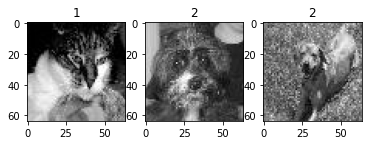

In [ ]:
for i in range(1, 4):                                            # Specifying how many images to show in the 3x3 grid
    plt.subplot(1, 3, i)                                         # Open next subplot
    plt.imshow(X_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(y[i]);

### Perform Normalization of the pixel values.

- All values should lie between 0 and 1 after normalization.

In [ ]:
def normalize_X(X):
    X = X/255 # Write code to normalize the pixel values.

    return X

In [ ]:
X = normalize_X(X)

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel4057,pixel4058,pixel4059,pixel4060,pixel4061,pixel4062,pixel4063,pixel4064,pixel4065,pixel4066,pixel4067,pixel4068,pixel4069,pixel4070,pixel4071,pixel4072,pixel4073,pixel4074,pixel4075,pixel4076,pixel4077,pixel4078,pixel4079,pixel4080,pixel4081,pixel4082,pixel4083,pixel4084,pixel4085,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096
0,0.764706,0.768627,0.776471,0.784314,0.792157,0.800000,0.807843,0.811765,0.803922,0.807843,0.815686,0.815686,0.800000,0.760784,0.717647,0.682353,0.670588,0.686275,0.666667,0.615686,0.603922,0.631373,0.635294,0.611765,0.650980,0.678431,0.662745,0.658824,0.705882,0.745098,0.780392,0.831373,0.776471,0.800000,0.807843,0.800000,0.803922,0.819608,0.815686,0.796078,...,0.658824,0.686275,0.670588,0.650980,0.670588,0.694118,0.741176,0.815686,0.800000,0.768627,0.784314,0.760784,0.682353,0.694118,0.733333,0.694118,0.654902,0.678431,0.709804,0.721569,0.717647,0.713725,0.713725,0.721569,0.717647,0.674510,0.654902,0.678431,0.686275,0.662745,0.658824,0.682353,0.631373,0.639216,0.643137,0.639216,0.650980,0.666667,0.666667,0.647059
1,0.039216,0.027451,0.015686,0.011765,0.015686,0.019608,0.015686,0.015686,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.035294,0.086275,0.023529,0.015686,0.000000,0.082353,0.043137,0.066667,0.082353,0.000000,0.003922,0.043137,0.019608,0.031373,0.035294,0.000000,0.003922,0.054902,0.000000,0.023529,0.000000,0.035294,0.000000,0.015686,...,0.607843,0.525490,0.490196,0.478431,0.431373,0.431373,0.478431,0.509804,0.462745,0.490196,0.431373,0.384314,0.427451,0.431373,0.431373,0.494118,0.674510,0.690196,0.690196,0.666667,0.658824,0.674510,0.690196,0.694118,0.686275,0.678431,0.556863,0.549020,0.372549,0.333333,0.423529,0.564706,0.501961,0.658824,0.462745,0.564706,0.545098,0.521569,0.545098,0.607843
2,0.792157,0.760784,0.800000,0.756863,0.772549,0.737255,0.764706,0.701961,0.650980,0.494118,0.392157,0.396078,0.431373,0.462745,0.454902,0.400000,0.431373,0.400000,0.454902,0.462745,0.388235,0.431373,0.486275,0.419608,0.478431,0.458824,0.505882,0.498039,0.364706,0.482353,0.200000,0.533333,0.376471,0.262745,0.200000,0.250980,0.223529,0.203922,0.223529,0.180392,...,0.525490,0.462745,0.694118,0.803922,0.815686,0.823529,0.733333,0.843137,0.749020,0.737255,0.533333,0.427451,0.243137,0.298039,0.184314,0.329412,0.356863,0.282353,0.211765,0.219608,0.290196,0.325490,0.274510,0.200000,0.203922,0.231373,0.192157,0.184314,0.254902,0.250980,0.211765,0.243137,0.247059,0.266667,0.235294,0.305882,0.243137,0.298039,0.286275,0.345098
3,0.435294,0.505882,0.654902,0.356863,0.454902,0.584314,0.317647,0.439216,0.498039,0.552941,0.474510,0.450980,0.454902,0.439216,0.498039,0.505882,0.588235,0.494118,0.701961,0.592157,0.501961,0.611765,0.600000,0.717647,0.396078,0.568627,0.823529,0.415686,0.619608,0.505882,0.658824,0.545098,0.478431,0.419608,0.443137,0.643137,0.498039,0.407843,0.572549,0.592157,...,0.137255,0.176471,0.090196,0.207843,0.172549,0.486275,0.909804,0.901961,0.662745,0.435294,0.325490,0.392157,0.529412,0.149020,0.701961,0.309804,0.537255,0.552941,0.721569,0.400000,0.384314,0.329412,0.419608,0.321569,0.470588,0.458824,0.231373,0.486275,0.403922,0.592157,0.372549,0.364706,0.729412,0.360784,0.384314,0.396078,0.262745,0.352941,0.494118,0.419608
4,0.360784,0.329412,0.337255,0.313725,0.325490,0.325490,0.325490,0.341176,0.333333,0.333333,0.333333,0.329412,0.329412,0.333333,0.349020,0.360784,0.698039,0.776471,0.831373,0.827451,0.819608,0.835294,0.831373,0.807843,0.800000,0.788235,0.803922,0.792157,0.831373,0.850980,0.803922,0.835294,0.772549,0.807843,0.160784,0.086275,0.431373,0.847059,0.725490,0.850980,...,0.584314,0.639

### Reshape image data to (nimg, img_rows, img_cols, 1) shape.

- Use **ntrain** as **nimg**.

- Use **dim** as **img_rows**, and **img_cols**.

In [ ]:
print("Previous shape, pixels are in 1D vector:", X.shape)

Previous shape, pixels are in 1D vector: (3000, 4096)


In [ ]:
def reshape_X_4d(X):
    X = X.values.reshape(-1, 64, 64, 1) # Write code to reshape X to the specified format.
    
    return X

In [ ]:
X = reshape_X_4d(X)

In [ ]:
print("After reshape, pixels are a 64x64x1 3D matrix:", X.shape)

After reshape, pixels are a 64x64x1 3D matrix: (3000, 64, 64, 1)


### Perform One Hot Encoding or Dummy Encoding of label **y**.

- Use **pd.get_dummies()** to perform this process.

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
print("Shape of y before: ", y.shape)

Shape of y before:  (3000,)


In [ ]:
def ohe_y(y):
    y = pd.get_dummies(y)# Write code to one hot encode y.

    return y

In [ ]:
y = ohe_y(y)

In [ ]:
print("Shape of y after: ", y.shape)
print(type(y))

Shape of y after:  (3000, 3)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
y = y.values
type(y)

numpy.ndarray

In [ ]:
X.shape

(3000, 64, 64, 1)

In [ ]:
y.shape

(3000, 3)

### Split the dataset into training and validation sets.

- Use **test_size** = **split_pct**

- Use **random_state** = **seed**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# fixing random seed for reproducibility
seed = 142

In [ ]:
# percentage of X which will be xval
split_pct = 0.1

In [ ]:
def train_val_split(X, y, seed, split_pct):
    xtrain, xval, ytrain, yval = train_test_split(X, y, test_size = 0.1 , random_state = seed) # Write code to split X and y into train and validation sets.

    return xtrain, xval, ytrain, yval

In [ ]:
xtrain, xval, ytrain, yval = train_val_split(X, y, seed, split_pct)

In [ ]:
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(2700, 64, 64, 1) (2700, 3) (300, 64, 64, 1) (300, 3)


## CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Model Architecture

- Specify **input_shape=(dim,dim,1)** in 1st layer.

- Specify **nclasses** as the number of hidden units in the last layer of the model with appropriate activation function.

In [ ]:
dim = 64
nclasses = 3

In [ ]:
def build_model(dim, nclasses):
    # Build your model here.
    model =Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))


    return model

In [ ]:
model = build_model(dim, nclasses)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

### Compile the model

- Use **adam** as the **optimizer**.

- Use **accuracy** as the **metrics**.

In [ ]:
def compile_model(model):
    # Compile your model here.
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
model = compile_model(model)

### Create a Learning Rate Annealer

- It should monitor **val_acc**.

- It should have **patience=3**, **factor=0.5**, and **min_lr=0.00001**.

In [ ]:
def lr_annealer():
    lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)  # Create a Learning Rate Annealer here.

    return lr_reduction

In [ ]:
lr_reduction = lr_annealer()

### Data Augmentation

- The process of Data Augmentation will be taught in-depth in Computer Vision - II.

In [ ]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images horizontally
          vertical_flip=False                  # randomly flip images vertically
          )

In [ ]:
#datagen.fit(X)
datagen.fit(xtrain)

### Fit the model

- Use **fit_generator** for fitting the model with the training data **xtrain**, **ytrain** and **batch_size** inside **datagen.flow**

- Use **epochs=epochs**.

- Specify **xval, yval** as the **validation_data**.

- Also, specify the **lr_reduction** as the callback.

- Properly compute the **steps_per_epoch** using the **batch_size**.

In [ ]:
epochs = 100
batch_size = 64

In [ ]:
def fit_model(model, epochs, batch_size):
    history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size = batch_size), 
                                  epochs = epochs, validation_data = (xval, yval), 
                                  verbose = 1, steps_per_epoch = xtrain.shape[0]/batch_size,
                                  callbacks = lr_reduction) # Fit your model here.      
    return model, history

In [ ]:
model, history = fit_model(model, epochs, batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
42/42 [==============================] - 47s 73ms/step - loss: 1.1162 - accuracy: 0.3855 - val_loss: 1.0464 - val_accuracy: 0.4567
Epoch 2/100
42/42 [==============================] - 2s 43ms/step - loss: 0.9351 - accuracy: 0.5159 - val_loss: 0.8952 - val_accuracy: 0.5933
Epoch 3/100
42/42 [==============================] - 2s 43ms/step - loss: 0.8073 - accuracy: 0.5945 - val_loss: 0.7607 - val_accuracy: 0.6300
Epoch 4/100
42/42 [==============================] - 2s 43ms/step - loss: 0.7689 - accuracy: 0.6198 - val_loss: 0.7219 - val_accuracy: 0.6400
Epoch 5/100
42/42 [==============================] - 2s 44ms/step - loss: 0.7518 - accuracy: 0.6480 - val_loss: 0.7449 - val_accuracy: 0.6167
Epoch 6/100
42/42 [==============================] - 2s 43ms/step - loss: 0.7369 - accuracy: 0.6262 - val_loss: 0.7226 - val_accuracy: 0.6300
Epoch 7/100
42/42 [==============================] - 2s 43ms/step - loss: 0.6978 - accuracy: 0.6577 - val_loss: 0.7306 - val_accuracy: 0.6367
Epoch

### Plotting Loss and Accuracy

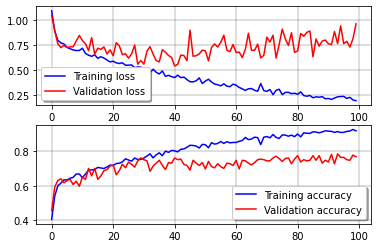

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

### Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)

In [ ]:
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot, axis=1)

In [ ]:
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval, axis=1)

In [ ]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)

In [ ]:
confusion_mtx

array([[59, 21, 11],
       [27, 76, 11],
       [ 0,  0, 95]])

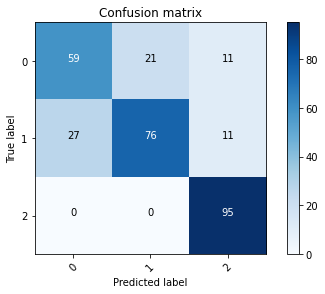

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

### Plot Errors

In [ ]:
errors = (ypred - ytrue != 0)

In [ ]:
ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

In [ ]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((64, 64)), cmap=plt.cm.gray)
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            plt.subplots_adjust(bottom = 0.001)
            n += 1

In [ ]:
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

In [ ]:
# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

In [ ]:
# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

In [ ]:
# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

In [ ]:
# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

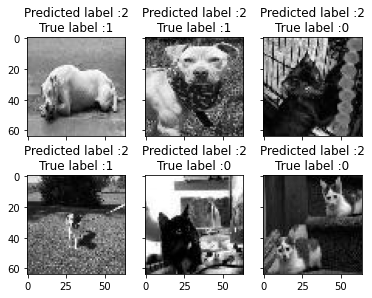

In [ ]:
# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)